In [40]:
import pandas as pd
import re,os,glob
import numpy as np
from ete3 import Tree,NCBITaxa
from matplotlib import rc
import collections
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

ncbi = NCBITaxa()
#ncbi.update_taxonomy_database()

%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
#rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
# ncbi.update_taxonomy_database()
TREE_DIR = '/Users/daviddylus/Projects/r2t/yeast/'
#tree_file = '/Users/daviddylus/mnt/monthly/yeast/ass4.fa.contree'
tree_file = '/Volumes/Recovery 1/projects/r2t/yeast/yeast_phylogeny/r2t_435/like_shen_2018/concat.fa.contree'
#tree_file = 'd7d5073298daea4753db88f67a01efb71874913f.phy.treefile'
# sra_file = '/Users/daviddylus/projects/r2t/yeast/yeast_phylogeny/r2t_385/yeast_sra_all.csv'
# ref_file = '/Users/daviddylus/projects/r2t/yeast/yeast_phylogeny/ref_species_id.csv'

rokas_tree = '/Users/daviddylus/Projects/r2t/yeast/1_molecular_phylogenetics/1_27phylogenetic_trees/343_2408OGs.treefile'
# rokas_names = pd.read_csv('/Users/daviddylus/projects/r2t/yeast/yeast_phylogeny/r2t_385/rokas_names_classification.csv')
# r2t_names = pd.read_csv('/Users/daviddylus/projects/r2t/yeast/yeast_phylogeny/r2t_385/r2t_names_classifications.csv')
# rokas_names.head()

all_names = pd.read_csv('/Users/daviddylus/Projects/r2t/yeast/FINAL_combined.csv')
all_names = all_names.fillna('')
all_names.head()

,taxid,rokas_tree_id,rokas_name,rokas_clade,r2t_tree_id,r2t_name,clade,order,genus,family,use,dataset_origin,r2t_qmarks,r2t_seq_len,r2t_dashes,r2t_xxs,rokas_qmarks,rokas_seq_len,rokas_dashes,rokas_xxs
0,43968,yHMPu5000034654_Aciculoconidium_aculeatum,Aciculoconidium aculeatum,CUG-Ser1,ACIAC_1,Aciculoconidium aculeatum,saccharomyceta,Saccharomycetales,Aciculoconidium,Debaryomycetaceae,Aciculoconidium aculeatum,Shen new,0.071200,0.760035,0.097661,0.071104,0.0,0.888895,0.044483,0.066622
1,54196,Alloascoidea_hylecoeti,Alloascoidea hylecoeti,Alloascoideaceae,ALLHY_1,Alloascoidea hylecoeti,saccharomyceta,Saccharomycetales,Alloascoidea,Alloascoideaceae,Alloascoidea hylecoeti,This study,0.054437,0.415776,0.132154,0.397633,0.0,0.892511,0.047687,0.059802
2,53487,yHMPu5000026137_Ambrosiozyma_ambrosiae,Ambrosiozyma ambrosiae,Pichiaceae,AMBAM_1,Ambrosiozyma ambrosiae,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma ambrosiae,Shen new,0.072012,0.680842,0.138069,0.109078,0.0,0.895328,0.036399,0.068273
3,489715,Ambrosiozyma_kashinagacola,Ambrosiozyma kashinagacola,Pichiaceae,AMBKA_1,Ambrosiozyma kashinagacola,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma kashinagacola,This study,0.066941,0.489771,0.133046,0.310242,0.0,0.902893,0.037292,0.059815
4,904902,yHMPu5000035040_Ambrosiozyma_maleeae,Ambrosiozyma maleeae,Pichiaceae,AMBMA_1,Ambrosiozyma maleeae,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma maleeae,Shen new,0.069088,0.604757,0.133855,0.192299,0.0,0.895989,0.036583,0.067427


In [47]:
all_names.columns

Index(['taxid', 'rokas_tree_id', 'rokas_name', 'rokas_clade', 'r2t_tree_id',
       'r2t_name', 'clade', 'order', 'genus', 'family', 'use',
       'dataset_origin', 'r2t_qmarks', 'r2t_seq_len', 'r2t_dashes', 'r2t_xxs',
       'rokas_qmarks', 'rokas_seq_len', 'rokas_dashes', 'rokas_xxs'],
      dtype='object')

# Read in trees
## Rokas tree

In [41]:
# rokas tree
rokastree = Tree(rokas_tree)
for leaf in rokastree:
    if leaf.name in list(all_names['rokas_tree_id']):
        sub_df = all_names.loc[all_names['rokas_tree_id'] == leaf.name]
        new_name = list(sub_df['use'])
        leaf.name = new_name[0]
    else:
        new_name = leaf.name.replace('_',' ')
        print(new_name)
        leaf.name = new_name
rokastree.set_outgroup( rokastree&"Schizosaccharomyces pombe" )
rokastree.ladderize()

# rt.write(format=1, outfile=os.path.join(TREE_DIR,tree_file.split('.')[0]+'.rokas.adapted.nwk')) 
#rt.write(format=2, outfile=os.path.join('/Users/daviddylus/Desktop/rokas.adapted.nwk')) 

# print(rt)

343

## r2t tree

In [46]:
# r2t tree
r2ttree = Tree(tree_file)
print(len(r2ttree.get_leaf_names()))
#t.prune([sp for sp in t.get_leaf_names() if sp not in ['BREsp_1', 'KLULA_1', 'TRIPE_1']])
r2ttree.prune([sp for sp in r2ttree.get_leaf_names() if sp not in ['TRIPE_1']])

for leaf in r2ttree:
    if leaf.name in list(all_names['r2t_tree_id']):
        sub_df = all_names.loc[all_names['r2t_tree_id'] == leaf.name]
        new_name = list(sub_df['use'])
        leaf.name = new_name[0]
    else:
        print(leaf.name)
r2ttree.set_outgroup( r2ttree&"Schizosaccharomyces pombe" )
r2ttree.ladderize()
#t.write(format=2, outfile=os.path.join('/Users/daviddylus/Desktop/r2t.adapted.nwk'))
len(r2ttree.get_leaf_names())

435


434

## ncbi taxonomy tree
use the leaves from the given tree to get the ncbi reference tree

In [32]:
# flatten list of taxids
taxid = [int(i) for i in all_names['taxid'] if i != '']
# get the tree
tree = Tree(ncbi.get_topology(taxid).write(), format=1)

# transfer species ids to their filenames used for the computation
for leaf in tree.get_leaves():
    if int(leaf.name) in taxid:
        sub_df = all_names.loc[all_names['taxid'] == int(leaf.name)]
        new_name = list(sub_df['use'])
        leaf.name = new_name[0]
    else:
        print(leaf.name)
print(len(tree.get_leaf_names()))
tree.set_outgroup( tree&"Schizosaccharomyces pombe" )
tree.ladderize()
# tree.write(format=1, outfile=os.path.join(TREE_DIR,'ncbi.nwk') )

2813651
2528786
412


412

# Get classification for each species
## Classifcatioin by genus, order, family

In [33]:
# IMPORTANT: update of the database doesn't have to be done constantly
#ncbi.update_taxonomy_database()
species_to_order = {}
use = 'rokas_clade'

for i,r in all_names.iterrows():
    if r['use'] not in species_to_order.keys():
        species_to_order[r['use']] = r[use]
        
# for i,r in r2t_names.iterrows():
#     if r['new_name'] not in species_to_order.keys():
#         species_to_order[r['new_name']] = r[use]
        
# print(len(species_to_order.keys()))
# species_to_order
species_to_order

{'Aciculoconidium aculeatum': 'CUG-Ser1',
 'Alloascoidea hylecoeti': 'Alloascoideaceae',
 'Ambrosiozyma ambrosiae': 'Pichiaceae',
 'Ambrosiozyma kashinagacola': 'Pichiaceae',
 'Ambrosiozyma maleeae': 'Pichiaceae',
 'Ambrosiozyma monospora': 'Pichiaceae',
 'Ambrosiozyma oregonensis': 'Pichiaceae',
 'Ambrosiozyma philentoma': 'Pichiaceae',
 'Ambrosiozyma pseudovanderkliftii': 'Pichiaceae',
 'Ambrosiozyma vanderkliftii': 'Pichiaceae',
 'Arthrobotrys oligospora': 'Ascomycota',
 'Ascoidea asiatica': 'CUG-Ser2',
 'Ascoidea rubescens DSM 1968': 'CUG-Ser2',
 'Ashbya aceri': 'Saccharomycetaceae',
 'Ashbya gossypii NRRL Y-1056': '',
 'Aspergillus glaucus': 'Ascomycota',
 'Aspergillus nidulans': 'Ascomycota',
 'Aspergillus oryzae ATCC 42149': 'Ascomycota',
 'Babjeviella inositovora NRRL Y-12698': 'CUG-Ser1',
 'Barnettozyma californica': 'Phaffomycetaceae',
 'Barnettozyma hawaiiensis': 'Phaffomycetaceae',
 'Barnettozyma populi': 'Phaffomycetaceae',
 'Barnettozyma pratensis': 'Phaffomycetaceae',
 '

In [34]:
# species_to_order['Yarrowia lipolytica'] = 'Dipodascaceae/Trichomonascaceae'
# species_to_order['Vanderwaltozyma polyspora'] = 'Saccharomycetaceae'
# test = list(filter(lambda x:'Yarrowia lipolytica' in x, species_to_order.keys()))
# test

## Get distinct colours for each classfication
we get for each classification a distinct colour

In [35]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
unique_phylogenetic_grouping = list(set(list(species_to_order.values())))
N = len(unique_phylogenetic_grouping)
order_color = {}
color_order = {}
overlap = list({name for name in mcd.CSS4_COLORS})
overlap.remove('white')
for i, order in enumerate(unique_phylogenetic_grouping):
    order_color[str(order)] = overlap[i]
    color_order[overlap[i]] = order
order_color
# genus
# order_color = {'Aciculoconidium': 'olivedrab',
#  'Alloascoidea': 'lightgray',
#  'Ambrosiozyma': 'tan',
#  'Arthrobotrys': 'navy',
#  'Ascoidea': 'aliceblue',
#  'Aspergillus': 'beige',
#  'Babjeviella': 'lightslategrey',
#  'Barnettozyma': 'azure',
#  'Blastobotrys': 'dimgrey',
#  'Botryozyma': 'lavender',
#  'Botrytis': 'turquoise',
#  'Brettanomyces': 'rebeccapurple',
#  'Candida': 'darkred',
#  'Cephaloascus': 'lightgrey',
#  'Citeromyces': 'springgreen',
#  'Clavispora': 'lightslategray',
#  'Coccidioides': 'darkslateblue',
#  'Curvularia': 'lemonchiffon',
#  'Cyberlindnera': 'darkgray',
#  'Danielozyma': 'purple',
#  'Deakozyma': 'greenyellow',
#  'Debaryomyces': 'darkturquoise',
#  'Diddensiella': 'darkgoldenrod',
#  'Dipodascus': 'lightpink',
#  'Diutina': 'darkorchid',
#  'Eremothecium': 'bisque',
#  'Fusarium': 'deeppink',
#  'Geotrichum': 'cornflowerblue',
#  'Groenewaldozyma': 'khaki',
#  'Hanseniaspora': 'lime',
#  'Hyphopichia': 'darksalmon',
#  'Kazachstania': 'orchid',
#  'Kluyveromyces': 'silver',
#  'Kodamaea': 'indianred',
#  'Komagataella': 'seashell',
#  'Kregervanrija': 'yellow',
#  'Kuraishia': 'lightyellow',
#  'Kurtzmaniella': 'lavenderblush',
#  'Lachancea': 'salmon',
#  'Lipomyces': 'darkkhaki',
#  'Lodderomyces': 'saddlebrown',
#  'Magnusiomyces': 'gold',
#  'Martiniozyma': 'powderblue',
#  'Metschnikowia': 'gray',
#  'Meyerozyma': 'sienna',
#  'Middelhovenomyces': 'cyan',
#  'Millerozyma': 'royalblue',
#  'Nadsonia': 'orange',
#  'Nakaseomyces': 'plum',
#  'Nakazawaea': 'hotpink',
#  'Naumovozyma': 'mediumturquoise',
#  'Neurospora': 'indigo',
#  'Ogataea': 'limegreen',
#  'Pachysolen': 'skyblue',
#  'Parastagonospora': 'cadetblue',
#  'Passalora': 'dimgray',
#  'Peterozyma': 'brown',
#  'Phaffomyces': 'snow',
#  'Pichia': 'ghostwhite',
#  'Priceomyces': 'mediumaquamarine',
#  'Saccharomyces': 'navajowhite',
#  'Saccharomycodes': 'lightsalmon',
#  'Saccharomycopsis': 'whitesmoke',
#  'Saitoella': 'pink',
#  'Saturnispora': 'orangered',
#  'Scheffersomyces': 'darkcyan',
#  'Schizosaccharomyces': 'lightcyan',
#  'Sclerotinia': 'thistle',
#  'Spathaspora': 'linen',
#  'Spencermartinsiella': 'yellowgreen',
#  'Sporopachydermia': 'floralwhite',
#  'Starmera': 'coral',
#  'Starmerella': 'burlywood',
#  'Sugiyamaella': 'palegreen',
#  'Suhomyces': 'darkseagreen',
#  'Tetrapisispora': 'magenta',
#  'Teunomyces': 'darkolivegreen',
#  'Thermothelomyces': 'moccasin',
#  'Tortispora': 'crimson',
#  'Torulaspora': 'green',
#  'Trigonopsis': 'mistyrose',
#  'Vanderwaltozyma': 'darkgrey',
#  'Wickerhamia': 'lightseagreen',
#  'Wickerhamiella': 'goldenrod',
#  'Wickerhamomyces': 'mediumseagreen',
#  'Xylona': 'forestgreen',
#  'Yamadazyma': 'steelblue',
#  'Yarrowia': 'black',
#  'Yueomyces': 'fuchsia',
#  'Zygoascus': 'mediumspringgreen',
#  'Zygosaccharomyces': 'maroon',
#  'Zygotorulaspora': 'palegoldenrod',
#  'Zymoseptoria': 'lawngreen',
#  'Saprochaete': 'lightgreen',
#  'Unavailable': 'white'}

# order
# order_color = {'Capnodiales': 'indianred',
#  'Eurotiales': 'olivedrab',
#  'Helotiales': 'lemonchiffon',
#  'Hypocreales': 'salmon',
#  'Onygenales': 'pink',
#  'Orbiliales': 'lightsalmon',
#  'Pleosporales': 'snow',
#  'Saccharomycetales': 'darkgrey',
#  'Schizosaccharomycetales': 'darkkhaki',
#  'Sordariales': 'seashell',
#  'Xylonales': 'darkgoldenrod',
#  'Unavailable': 'white'}

# family
# order_color = {'Alloascoideaceae': 'ghostwhite',
#  'Ascoideaceae': 'steelblue',
#  'Aspergillaceae': 'darkgoldenrod',
#  'Cephaloascaceae': 'lightcyan',
#  'Chaetomiaceae': 'mediumturquoise',
#  'Debaryomycetaceae': 'powderblue',
#  'Dipodascaceae': 'seashell',
#  'Lipomycetaceae': 'darkkhaki',
#  'Metschnikowiaceae': 'lightslategray',
#  'Mycosphaerellaceae': 'limegreen',
#  'Nectriaceae': 'lemonchiffon',
#  'Orbiliaceae': 'indianred',
#  'Phaeosphaeriaceae': 'magenta',
#  'Phaffomycetaceae': 'lavender',
#  'Pichiaceae': 'cadetblue',
#  'Pleosporaceae': 'green',
#  'Saccharomycetaceae': 'pink',
#  'Saccharomycodaceae': 'darkgrey',
#  'Saccharomycopsidaceae': 'darkcyan',
#  'Schizosaccharomycetaceae': 'snow',
#  'Sclerotiniaceae': 'lightsalmon',
#  'Sordariaceae': 'salmon',
#  'Trichomonascaceae': 'darkolivegreen',
#  'Trigonopsidaceae': 'forestgreen',
#  'Xylonaceae': 'olivedrab',
#  'Unavailable': 'white'}

# rokas
order_color = {'Alloascoideaceae': 'darkcyan',
 'CUG-Ala': 'aliceblue',
 'CUG-Ser1': 'slategrey',
 'CUG-Ser2': 'thistle',
 'Dipodascaceae/Trichomonascaceae': 'aqua',
 'Lipomycetaceae': 'cornsilk',
 'Phaffomycetaceae': 'burlywood',
 'Pichiaceae': 'greenyellow',
 'Saccharomycetaceae': 'brown',
 'Saccharomycodaceae': 'royalblue',
 'Sporopachydermia clade': 'olive',
 'Trigonopsidaceae': 'paleturquoise',
 'Unavailable': 'white',
 'Ascomycota': 'lightgrey'}

# dataset_origin
# order_color = {'': 'white',
#  'This study': 'blue',
#  'Shen from public': 'aquamarine',
#  'Simulated here': 'sienna',
#  'OMA': 'darkmagenta',
#  'Shen new': 'darkgrey'}

# Display the individual trees ladderized rooted 
we get for each classification a distinct colour

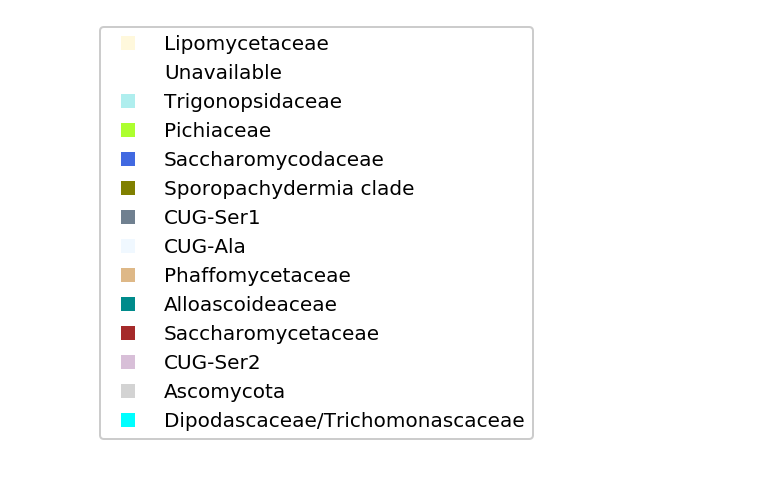

In [39]:
import matplotlib.pyplot as plt
import numpy as np

colors = list(order_color.values())
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(len(colors))]
labels = list(order_color.keys())
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=True)

def export_legend(legend, filename="legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(TREE_DIR,'legend_'+use+'.pdf'), dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.gca().set_axis_off()
# plt.show()
plt.savefig(os.path.join(TREE_DIR,'legend_'+use+'.pdf'), transparent = True)

In [16]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib._color_data as mcd
# import matplotlib.patches as mpatch

# overlap = {name for name in mcd.CSS4_COLORS
#            if "xkcd:" + name in mcd.XKCD_COLORS}

# fig = plt.figure(figsize=[4, 16])
# ax = fig.add_axes([0, 0, 1, 1])
# j = 0
# for n, v in order_color.items():
#     weight = None
#     cn = mcd.CSS4_COLORS[v]
#     r2 = mpatch.Rectangle((0, j), 0.5,1, color=cn)

#     txt = ax.text(0.5, j+.5, '  ' + n, va='center', fontsize=10,
#                       weight=weight)
#     #ax.add_patch(r1)
#     ax.add_patch(r2)
#     ax.axhline(j, color='k')
#     j += 1

# # ax.text(.5, j + 1.5, 'X11', ha='center', va='center')
# ax.set_xlim(0, 1.5)
# ax.set_ylim(0, j + 2)
# ax.axis('off')
# fig.savefig(os.path.join(TREE_DIR,'legend_'+use+'.pdf'), transparent = True)

## Set layout style

In [17]:
from ete3 import Tree, TextFace, NodeStyle, Face, TreeStyle, AttrFace, faces, StackedBarFace, COLOR_SCHEMES
style = NodeStyle()


# def make_branches_bigger(node, new_size):
#     node.img_style["hz_line_width"] = new_size # Change the horizotal lines stroke size
#     node.img_style["vt_line_width"] = new_size # Change the vertical lines stroke size
#     for c in node.children:
#         make_branches_bigger(c, new_size)

# simple_motifs = [
#         # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
#         [100, 160, "[]", 30, 100, "blue", "blue", None],
#         [160, 170, "[]", 30, 100, "blue", "red", None],
# ]


        
# def layout(node):
#     if node.is_leaf():
#         N = AttrFace("name", fsize=30)
#         faces.add_face_to_node(N, node, 0)
#         percents = [r2t_names.loc[r2t_names.new_name==node.name].xxs.values[0]*100]
#         percents.append(r2t_names.loc[r2t_names.new_name==node.name].qmarks.values[0]*100)
#         percents.append(r2t_names.loc[r2t_names.new_name==node.name].dashes.values[0]*100)
#         percents.append(r2t_names.loc[r2t_names.new_name==node.name].seq_len.values[0]*100)
#         stackBarFace = StackedBarFace(percents=percents, width=500, height=150)
#         stackBarFace.rotable = False
# #         print(dir(stackBarFace))
#         faces.add_face_to_node(stackBarFace, node, 0, position='aligned')
# #         node.add_face(seqFace, 0, "aligned")

def make_branches_bigger(node, new_size):
    node.img_style["hz_line_width"] = new_size # Change the horizotal lines stroke size
    node.img_style["vt_line_width"] = new_size # Change the vertical lines stroke size
    for c in node.children:
        make_branches_bigger(c, new_size)
        
        
def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=46)
        faces.add_face_to_node(N, node, 0, position='aligned')

## Background colored trees
### NCBI

In [18]:
species_to_order

{'Aciculoconidium aculeatum': 'CUG-Ser1',
 'Alloascoidea hylecoeti': 'Alloascoideaceae',
 'Ambrosiozyma ambrosiae': 'Pichiaceae',
 'Ambrosiozyma kashinagacola': 'Pichiaceae',
 'Ambrosiozyma maleeae': 'Pichiaceae',
 'Ambrosiozyma monospora': 'Pichiaceae',
 'Ambrosiozyma oregonensis': 'Pichiaceae',
 'Ambrosiozyma philentoma': 'Pichiaceae',
 'Ambrosiozyma pseudovanderkliftii': 'Pichiaceae',
 'Ambrosiozyma vanderkliftii': 'Pichiaceae',
 'Arthrobotrys oligospora': 'Ascomycota',
 'Ascoidea asiatica': 'CUG-Ser2',
 'Ascoidea rubescens DSM 1968': 'CUG-Ser2',
 'Ashbya aceri': 'Saccharomycetaceae',
 'Ashbya gossypii NRRL Y-1056': '',
 'Aspergillus glaucus': 'Ascomycota',
 'Aspergillus nidulans': 'Ascomycota',
 'Aspergillus oryzae ATCC 42149': 'Ascomycota',
 'Babjeviella inositovora NRRL Y-12698': 'CUG-Ser1',
 'Barnettozyma californica': 'Phaffomycetaceae',
 'Barnettozyma hawaiiensis': 'Phaffomycetaceae',
 'Barnettozyma populi': 'Phaffomycetaceae',
 'Barnettozyma pratensis': 'Phaffomycetaceae',
 '

In [19]:
tree.set_outgroup( tree&"Schizosaccharomyces pombe" )
tree.ladderize()
make_branches_bigger(tree, 8)
for leaf in tree.get_leaves():
    a = tree&leaf.name
    a.set_style(NodeStyle())
    sp_name = leaf.name
#     print(leaf.name)
    a.img_style["hz_line_width"] = 8 # Change the horizotal lines stroke size
    a.img_style["vt_line_width"] = 8
#     test = list(filter(lambda x:sp_name in x, species_to_order.keys()))
    if sp_name in species_to_order.keys() and species_to_order[sp_name] != '':
        #print(leaf.name)
#         print(species_to_order[test[0]])
        a.img_style["bgcolor"] = order_color[str(species_to_order[sp_name])]
    else:
        a.img_style["bgcolor"] = 'white'

ts1 = TreeStyle()
ts1.show_scale = False
ts1.show_branch_support = False
ts1.show_leaf_name = False
ts1.mode = 'c'
ts1.layout_fn = layout

# 
tree.ladderize()
tree.render(os.path.join(TREE_DIR, 'ncbi_'+use+'.svg'), h=400, units="mm", tree_style=ts1, dpi=150)
#tree.render(, w=600, tree_style=ts1)
# t.render("~/Desktop/face_positions.png", w=800, tree_style=ts)


# tree.render("%%inline", tree_style=ts1)

{'faces': [[1591.178892662987,
   438.66632929164035,
   1654.5495648659805,
   529.265869761319,
   456,
   'Eremothecium coryli'],
  [695.6830901677166,
   410.7058368213205,
   772.9062578337952,
   527.9990122734212,
   355,
   'Scheffersomyces shehatae'],
  [272.22089989736645,
   1085.0008770847096,
   409.9268504167664,
   1112.4871896296254,
   282,
   'Brettanomyces custersianus'],
  [686.6038174009111,
   421.9298876640746,
   762.9628254885981,
   534.4139554153628,
   354,
   'Scheffersomyces lignosus'],
  [612.8211061700881,
   1788.4252898335328,
   708.2539045411127,
   1902.0680171382498,
   203,
   'Cyberlindnera misumaiensis'],
  [1911.0084176234438,
   885.3152595668136,
   2011.8668025011918,
   930.3949593827202,
   507,
   'Kazachstania solicola'],
  [1224.000599017303,
   304.5202923876949,
   1242.216192753028,
   407.5832371167296,
   409,
   'Candida metapsilosis'],
  [864.5980449308908,
   226.21253148296626,
   942.9461758946366,
   446.71585406111683,
   37

### rokas

In [20]:
rokastree.set_outgroup( rokastree&"Schizosaccharomyces pombe" )
rokastree.ladderize()
make_branches_bigger(tree, 8)
for leaf in rokastree.get_leaves():
    a = rokastree&leaf.name
    a.set_style(NodeStyle())
    sp_name = leaf.name
    a.img_style["hz_line_width"] = 8 # Change the horizotal lines stroke size
    a.img_style["vt_line_width"] = 8
#     test = list(filter(lambda x:sp_name in x, species_to_order.keys()))
    if sp_name in species_to_order.keys() and species_to_order[sp_name] != '':
        #print(leaf.name)
#         print(species_to_order[test[0]])
        a.img_style["bgcolor"] = order_color[str(species_to_order[sp_name])]
    else:
        print(sp_name)
        a.img_style["bgcolor"] = 'white'

rtts = TreeStyle()
rtts.show_scale = False
rtts.show_branch_support = False
rtts.show_leaf_name = False
rtts.mode = 'c'
rtts.layout_fn = layout

# 
rokastree.ladderize()
rokastree.render(os.path.join(TREE_DIR, 'rokas_'+use+'.svg'), h=400, units="mm", tree_style=rtts, dpi=150)
#tree.render(, w=600, tree_style=ts1)
# t.render("~/Desktop/face_positions.png", w=800, tree_style=ts)


# tree.render("%%inline", tree_style=ts1)

{'faces': [[1381.3301439748557,
   1973.3792556003561,
   1430.8789865851697,
   2111.315766714445,
   148,
   'Starmera amethionina'],
  [502.85574304009225,
   548.3029319934224,
   584.7661572674543,
   627.998889429551,
   430,
   'Ogataea minuta'],
  [1996.1832896195258,
   1263.439066346717,
   2120.209660091458,
   1291.8064586877194,
   14,
   'Aspergillus nidulans'],
  [617.8226976921725,
   364.07787836329567,
   721.1881441327264,
   509.6139141508746,
   453,
   'Ambrosiozyma philentoma'],
  [1104.3247071176143,
   207.3608996544293,
   1127.8116204796072,
   362.9282362391337,
   509,
   'Kurtzmaniella cleridarum'],
  [635.3106229397163,
   358.1958559198232,
   733.7169867585884,
   501.0737819219809,
   454,
   'Ambrosiozyma ambrosiae'],
  [600.0693937832743,
   369.8927415043632,
   708.809805003161,
   518.3820716571395,
   451,
   'Ambrosiozyma oregonensis'],
  [588.8152525013561,
   384.95760920996844,
   696.6674264895851,
   527.3163470348304,
   449,
   'Ambrosioz

### r2t

In [21]:
make_branches_bigger(r2ttree, 8)
r2ttree.set_outgroup( r2ttree&"Schizosaccharomyces pombe" )
r2ttree.ladderize()
for leaf in r2ttree.get_leaves():
    a = r2ttree&leaf.name
    a.set_style(NodeStyle())
    sp_name = leaf.name
    a.img_style["hz_line_width"] = 8 # Change the horizotal lines stroke size
    a.img_style["vt_line_width"] = 8
#     test = list(filter(lambda x:sp_name in x, species_to_order.keys()))
#     if len(test) > 0:
    if sp_name in species_to_order.keys() and species_to_order[sp_name] != '':
        #print(leaf.name)
#         print(species_to_order[test[0]])
        a.img_style["bgcolor"] = order_color[str(species_to_order[sp_name])]
    else:
        a.img_style["bgcolor"] = 'white'

r2tts1 = TreeStyle()
r2tts1.show_scale = False
r2tts1.show_branch_support = False
r2tts1.show_leaf_name = False
r2tts1.mode = 'c'
r2tts1.layout_fn = layout

# 
r2ttree.ladderize()
r2ttree.render(os.path.join(TREE_DIR, 'r2t_'+use+'.svg'), h=400, units="mm", tree_style=r2tts1, dpi=150)
#tree.render(, w=600, tree_style=ts1)
# t.render("~/Desktop/face_positions.png", w=800, tree_style=ts)


# tree.render("%%inline", tree_style=ts1)

{'faces': [[1650.237825927571,
   446.771238268504,
   1734.1847817646674,
   553.3283251929661,
   744,
   'Spathaspora passalidarum'],
  [1868.8904985071226,
   1558.1324018913167,
   1970.6873324640856,
   1621.3633521137156,
   74,
   'Dipodascus geniculatus'],
  [1863.2318805685525,
   1568.1020764830428,
   1946.9162650992187,
   1622.63639983971,
   75,
   'Dipodascus albidus'],
  [1874.4057619520543,
   1548.0841435793275,
   1976.8170659769037,
   1609.9980905560794,
   72,
   'Galactomyces candidus'],
  [1857.4310875523074,
   1577.991089392448,
   1963.1871489730743,
   1646.9228173124284,
   78,
   'Magnusiomyces clavatus'],
  [435.0542516159959,
   1641.9879338296605,
   547.1386638771942,
   1725.400049230567,
   351,
   'Kazachstania kunashirensis'],
  [1851.4893285076573,
   1587.7973794696509,
   2020.5596548675078,
   1697.2207571629353,
   80,
   'Magnusiomyces capitatus NRRL Y-17686'],
  [342.666667060953,
   737.2280387542462,
   483.9861771522878,
   821.375903564

## Plot trees with branch coloring
### Rokas Tree

In [22]:
rokas_names = all_names[pd.notnull(all_names['rokas_tree_id'])]
rokas_names

,taxid,rokas_tree_id,rokas_name,rokas_clade,r2t_tree_id,r2t_name,clade,order,genus,family,use,dataset_origin,r2t_qmarks,r2t_seq_len,r2t_dashes,r2t_xxs,rokas_qmarks,rokas_seq_len,rokas_dashes,rokas_xxs
0,43968,yHMPu5000034654_Aciculoconidium_aculeatum,Aciculoconidium aculeatum,CUG-Ser1,ACIAC_1,Aciculoconidium aculeatum,saccharomyceta,Saccharomycetales,Aciculoconidium,Debaryomycetaceae,Aciculoconidium aculeatum,Shen new,0.071200,0.760035,0.097661,0.071104,0.0,0.888895,0.044483,0.066622
1,54196,Alloascoidea_hylecoeti,Alloascoidea hylecoeti,Alloascoideaceae,ALLHY_1,Alloascoidea hylecoeti,saccharomyceta,Saccharomycetales,Alloascoidea,Alloascoideaceae,Alloascoidea hylecoeti,This study,0.054437,0.415776,0.132154,0.397633,0.0,0.892511,0.047687,0.059802
2,53487,yHMPu5000026137_Ambrosiozyma_ambrosiae,Ambrosiozyma ambrosiae,Pichiaceae,AMBAM_1,Ambrosiozyma ambrosiae,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma ambrosiae,Shen new,0.072012,0.680842,0.138069,0.109078,0.0,0.895328,0.036399,0.068273
3,489715,Ambrosiozyma_kashinagacola,Ambrosiozyma kashinagacola,Pichiaceae,AMBKA_1,Ambrosiozyma kashinagacola,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma kashinagacola,This study,0.066941,0.489771,0.133046,0.310242,0.0,0.902893,0.037292,0.059815
4,904902,yHMPu5000035040_Ambrosiozyma_maleeae,Ambrosiozyma maleeae,Pichiaceae,AMBMA_1,Ambrosiozyma maleeae,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma maleeae,Shen new,0.069088,0.604757,0.133855,0.192299,0.0,0.895989,0.036583,0.067427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,559307,,,Saccharomycetaceae,ZYGCB_1,Zygosaccharomyces rouxii CBS 732,saccharomyceta,Saccharomycetales,Zygosaccharomyces,Saccharomycetaceae,Zygosaccharomyces rouxii CBS 732,Shen from public,0.053167,0.903993,0.016422,0.026419,0.0,0.000000,0.000000,0.000000
439,1461763,,,Saccharomycetaceae,ZYGSA_1,Zygosaccharomyces sapae,saccharomyceta,Saccharomycetales,Zygosaccharomyces,Saccharomycetaceae,Zygosaccharomyces sapae,Shen from public,0.051157,0.915517,0.021321,0.012004,0.0,0.000000,0.000000,0.000000
440,48255,yHMPu5000034862_Zygotorulaspora_florentina,Zygotorulaspora florentina,Saccharomycetaceae,ZYGFL_1,Zygotorulaspora florentina,saccharomyceta,Saccharomycetales,Zygotorulaspora,Saccharomycetaceae,Zygotorulaspora florentina,Shen new,0.075543,0.754237,0.117982,0.052239,0.0,0.827084,0.036875,0.136041
441,42260,yHMPu5000026256_Zygotorulaspora_mrakii,Zygotorulaspora mrakii,Saccharomycetaceae,ZYGMR_1,Zygotorulaspora mrakii,saccharomyceta,Saccharomycetales,Zygotorulaspora,Saccharomycetaceae,Zygotorulaspora mrakii,Shen new,0.070197,0.734240,0.114894,0.080670,0.0,0.815938,0.035196,0.148866


In [23]:
from ete3 import Tree, Face, TextFace, NodeStyle, TreeStyle, SeqMotifFace, add_face_to_node

line_thickness = 20

def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=20, fgcolor="black")
        N.rotable = False
        faces.add_face_to_node(N, node, 0)
#         display(rokas_names.loc[rokas_names.use_old==node.name])
        percents = [rokas_names.loc[rokas_names.use==node.name].rokas_xxs.values[0]*100]
        percents.append(rokas_names.loc[rokas_names.use==node.name].rokas_qmarks.values[0]*100)
        percents.append(rokas_names.loc[rokas_names.use==node.name].rokas_dashes.values[0]*100)
        percents.append(rokas_names.loc[rokas_names.use==node.name].rokas_seq_len.values[0]*100)
#         print(percents)
        stackBarFace = StackedBarFace(percents=percents, width=500, height=150)
        stackBarFace.rotable = False
        faces.add_face_to_node(stackBarFace, node, 0, position='aligned')

for n in rokastree.traverse():
    nstyle = NodeStyle()
    nstyle["hz_line_width"] = line_thickness # Change the horizotal lines stroke size
    nstyle["vt_line_width"] = line_thickness
    if not n.is_leaf():
        leaves = n.get_leaf_names()
        all_orders = [order_color[str(species_to_order[l])] for l in leaves]
        counts = collections.Counter(all_orders)
        nstyle["vt_line_color"] = counts.most_common(1)[0][0]
        nstyle["hz_line_color"] = counts.most_common(1)[0][0]
#     if n.name in list(all_names['new_name']):
#         r = all_names.loc[all_names['new_name'] == n.name]
#         if r.is_ref.values[0]:
#             ref = True    
#     if n.support < 95 and not n.is_leaf():
#         nstyle["fgcolor"] = "red"
#         nstyle["size"] = 35
    if n.is_leaf():
        if n.name in species_to_order.keys():
    #         print(str(species_to_order[n.name]))
    #         nstyle["bgcolor"] = order_color[str(species_to_order[n.name])]
            nstyle["vt_line_color"] = order_color[str(species_to_order[n.name])]
            nstyle["hz_line_color"] = order_color[str(species_to_order[n.name])]
            nstyle["vt_line_width"] = line_thickness
            nstyle["hz_line_width"] = line_thickness
#         if ref:
#             nstyle["fgcolor"] = "blue"
#             nstyle["size"] = 35
    n.set_style(nstyle)
    

rokastree.ladderize()
rts = TreeStyle()
# rts.scale=0.1
rts.layout_fn = layout
rts.show_scale = True
rts.mode = 'c'
rts.show_leaf_name = False
# ts.show_branch_support = False
#t.render(os.path.join(TREE_DIR,tree_file.split('.')[0]+'.c_family.pdf'), w=800, tree_style=ts)
rokastree.render(os.path.join(TREE_DIR, 'rokas_branchcoloring_'+use+'.svg'), h=400, units="mm", tree_style=rts, dpi=150)

# rokastree.render(os.path.join(TREE_DIR, 'rokas_branchcoloring_'+use+'.svg'), h=400, units="mm", tree_style=rts, dpi=150)
#rt.render("%%inline",tree_style=rts)

{'faces': [[1368.62697406383,
   1914.2782912574496,
   1379.6171544584747,
   1944.6860702131532,
   148,
   'Starmera amethionina'],
  [1448.4087697325722,
   2249.0426059311353,
   1485.2707678613788,
   2319.7163428478557,
   148,
   None],
  [541.3539443747458,
   585.463633715894,
   559.685683961289,
   602.852185020631,
   430,
   'Ogataea minuta'],
  [308.5908813245677,
   368.0579298948543,
   372.067420936124,
   429.12486440690583,
   430,
   None],
  [1740.9370670926635,
   1238.043645681588,
   1768.1759763912376,
   1244.359158770994,
   14,
   'Aspergillus nidulans'],
  [2279.888835583281,
   1288.991616228385,
   2349.428861563478,
   1316.6848497902456,
   14,
   None],
  [681.7259897807944,
   457.2290624453775,
   705.0292852780875,
   488.99324113102983,
   453,
   'Ambrosiozyma philentoma'],
  [502.20846478630165,
   201.45684106328812,
   557.3848490661576,
   268.819682610328,
   453,
   None],
  [1116.9646146030173,
   363.7584174302077,
   1122.8004645619694,


### R2T tree

In [24]:
r2t_names = all_names[pd.notnull(all_names['r2t_tree_id'])]
r2t_names.loc[r2t_names.r2t_seq_len==0]
order_color
for k,v in species_to_order.items():
    if v == '':
        species_to_order[k] = 'Unavailable'

In [25]:
from ete3 import Tree, Face, TextFace, NodeStyle, TreeStyle, SeqMotifFace, add_face_to_node

simple_motifs = [
        # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
        [100, 160, "[]", 30, 100, "blue", "blue", None],
        [160, 170, "[]", 30, 100, "blue", "red", None],
]
       
def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=20)
        N.rotable = False
        faces.add_face_to_node(N, node, 0)
        percents = [r2t_names.loc[r2t_names.use==node.name].r2t_xxs.values[0]*100]
        percents.append(r2t_names.loc[r2t_names.use==node.name].r2t_qmarks.values[0]*100)
        percents.append(r2t_names.loc[r2t_names.use==node.name].r2t_dashes.values[0]*100)
        percents.append(r2t_names.loc[r2t_names.use==node.name].r2t_seq_len.values[0]*100)
        stackBarFace = StackedBarFace(percents=percents, width=500, height=150)
        stackBarFace.rotable = False
#         print(dir(stackBarFace))
        faces.add_face_to_node(stackBarFace, node, 0, position='aligned')
#         node.add_face(seqFace, 0, "aligned")

for n in r2ttree.traverse():
    nstyle = NodeStyle()
    nstyle["hz_line_width"] = line_thickness # Change the horizotal lines stroke size
    nstyle["vt_line_width"] = line_thickness
    if not n.is_leaf():
        leaves = n.get_leaf_names()
#         print(leaves)
        all_orders = [order_color[str(species_to_order[l])] for l in leaves]
        counts = collections.Counter(all_orders)
        nstyle["vt_line_color"] = counts.most_common(1)[0][0]
        nstyle["hz_line_color"] = counts.most_common(1)[0][0]
    ref = False
    if n.name in list(all_names['use']):
        r = all_names.loc[all_names['use'] == n.name]
#         if r.is_ref.values[0]:
#             ref = True    
    if n.support < 95 and not n.is_leaf():
        nstyle["fgcolor"] = "red"
        nstyle["size"] = 35
    if n.is_leaf():
        if n.name in species_to_order.keys():
    #         print(str(species_to_order[n.name]))
    #         nstyle["bgcolor"] = order_color[str(species_to_order[n.name])]
            nstyle["vt_line_color"] = order_color[str(species_to_order[n.name])]
            nstyle["hz_line_color"] = order_color[str(species_to_order[n.name])]
            nstyle["vt_line_width"] = line_thickness
            nstyle["hz_line_width"] = line_thickness
        if ref:
            nstyle["fgcolor"] = "blue"
            nstyle["size"] = 35
    n.set_style(nstyle)
    

r2ttree.ladderize()
ts = TreeStyle()
ts.show_scale = True
ts.show_leaf_name = False
ts.show_branch_support = False
# ts.scale =1.1
ts.layout_fn = layout
ts.mode = 'c'
#t.render(os.path.join(TREE_DIR,tree_file.split('.')[0]+'.c_family.pdf'), w=800, tree_style=ts)
r2ttree.render(os.path.join(TREE_DIR, 'r2t_branchcoloring_'+use+'.svg'), h=400, units="mm", tree_style=ts, dpi=150)

# r2ttree.render(os.path.join(TREE_DIR, 'r2t_branchcoloring_'+use+'.svg'), h=400, units="mm", tree_style=ts, dpi=150)
# t.render("%%inline",tree_style=ts)

{'faces': [[1672.1335419932086,
   495.1389353376323,
   1691.6348404081828,
   519.8653615618928,
   744,
   'Spathaspora passalidarum'],
  [1846.6207299178166,
   231.0323761797272,
   1892.219756595955,
   284.1884058878252,
   744,
   None],
  [1669.5304215150488,
   1449.2739062950277,
   1693.0858195704143,
   1463.947227823766,
   74,
   'Dipodascus geniculatus'],
  [2158.1016048585993,
   1715.4154987636066,
   2213.436268314447,
   1755.9467013417427,
   74,
   None],
  [1680.448922370666,
   1464.8891285696438,
   1699.8207209406137,
   1477.5527842658882,
   75,
   'Dipodascus albidus'],
  [2150.0403955439324,
   1729.6173552885525,
   2205.1968823892903,
   1770.7148600632743,
   75,
   None],
  [1654.2429849644009,
   1431.8842628622308,
   1677.9394300475915,
   1446.2537954104196,
   72,
   'Galactomyces candidus'],
  [2165.958616190424,
   1701.101712556361,
   2221.4599229484243,
   1741.0581650893585,
   72,
   None],
  [1668.857579362314,
   1467.7674668440977,
   16

In [48]:
# from ete3 import Tree, TextFace, NodeStyle, TreeStyle
# # t.set_outgroup( t&"Octopus vulgaris" )
# # t.ladderize()
# branch_lengths_to_leaf = []
# for leaf in t.get_leaves():
#     branch_lengths_to_leaf.append(leaf.dist)
# print(len(branch_lengths_to_leaf))
# #!/usr/bin/env python
# import numpy as np
# import matplotlib.mlab as mlab
# import matplotlib.pyplot as plt
# from matplotlib import rc

# %matplotlib inline

# # The following %config line changes the inline figures to have a higher DPI.
# # You can comment out (#) this line if you don't have a high-DPI (~220) display.
# %config InlineBackend.figure_format = 'retina'
# # Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
# # the histogram of the data
# n, bins, patches = plt.hist(branch_lengths_to_leaf, 30, facecolor='green', alpha=0.75)

# # add a 'best fit' line
# # y = mlab.normpdf( bins, mu, sigma)
# # l = plt.plot(bins)

# plt.xlabel('Coverages')
# plt.ylabel('Number of species')
# # plt.axis([40, 160, 0, 0.03])
# plt.grid(True)

# plt.show()

# Analyse trees

## Load functions

In [111]:
import dendropy
from dendropy import Tree
from dendropy.calculate import treecompare

def get_bcn(msp, rsp, rtree, mtree):
    all_sp_sets = []
    bcn = []
    mset = get_species_sets(msp, mtree)
    for node in rtree.preorder_node_iter():
        all_sp_sets.append([l.taxon.label for l in node.leaf_iter()])
    for s in all_sp_sets:
        bcn.append(get_jaccard_sim(mset, s))
    #print(bcn)
    return np.max(bcn)

# IMPORTANT: update of the database doesn't have to be done constantly
# ncbi.update_taxonomy_database()
# possibilities: ['no rank', 'no rank', 'superkingdom', 'no rank', 'family', 'no rank', 
#                 'subphylum', 'kingdom', 'subkingdom', 'species', 'phylum', 'class', 'order', 'genus']


# species_to_order = {}
# for k,v in name2taxid.items():
#     lineage = ncbi.get_lineage(v[0])
#     rank = ncbi.get_rank(lineage)
# #     print(list(rank.values()))
#     for i,d in rank.items():
#         if 'family' == d:
#             species_to_order[k] = i
#     if k not in species_to_order.keys():
#         species_to_order[k] = 1



def find_monophyletic_max(x,t):
    z = 0.0
    zk = 1
    res = []
    for node in t.traverse():
        leaves_at_node = set(node.get_leaf_names())
        leaf_intersection = leaves_at_node & x
        y1 = len(leaf_intersection) / len(leaves_at_node) # is 1 if there is a node that has all the leaves
        y2 = len(leaf_intersection) / len(x) # is 1 if there is a node where the intersection has all the leaves
#         ydiff = abs(y1 - y2)
        if y1 > 0 and y2 > 0:
            if y1 > y2:
                ydiff = 1-(y2/y1)
            if y2 > y1:
                ydiff = 1-(y1/y2)
#             ydiff = abs(y1 - y2) # is 0 if all species part of clade are at that node and have no other species
#             ysum = y1 + y2
            if ydiff < zk and y1 > z and ydiff != 0:
#                 print('y1: {}\t y2: {}\t ydiff:{}'.format(y1,y2,ydiff))
                zk = ydiff
                z = y1
                res.append(y1)
    if res:
        return res[-1]
    else:
#         print(y1, y2)
        return None

def find_monophyletic(x,t):
    for node in t.traverse():
        leaves_at_node = set(node.get_leaf_names())
        if len(leaves_at_node - x) == 0 and len(leaves_at_node) > 1:
            return len(leaves_at_node & x)
        
def find_monophyletic_max2(x,t):
    z = 0.0
    zk = 1
    res = []
    for node in t.traverse():
        leaves_at_node = set(node.get_leaf_names())
        leaf_intersection = leaves_at_node & x
        if len(leaf_intersection) > 0:
            if len(leaves_at_node) <= len(x):
#                 print('ltree<=l: {}, {}'.format(len(leaves_at_node), len(x)))
                y = len(leaves_at_node)/len(x)
#                 if y == 1:
#                     print(x)
#                     print(leaves_at_node)
#                     print(len(leaves_at_node))
            else:
#                 print('x<l: {}'.format(len(x)/len(leaves_at_node)))
                y = len(x)/len(leaves_at_node)
#                 if y > 0.9:
#                     print(leaves_at_node)
#                     print(len(leaves_at_node))
        res.append(y)
#     print(res)
    return max(res)

## Assess monophyly

In [118]:
use = 'genus'


use_names = all_names[all_names[use] != '']

rokas_order_to_species = {v:[] for v in set(use_names[use]) if v != ''}
r2t_order_to_species = {v:[] for v in set(use_names[use]) if v != ''}

for i,r in use_names[use_names.rokas_tree_id != ''].iterrows():
    if r['rokas_tree_id'] != np.nan:
#         print(r['rokas'])
        if r[use] != '':
            rokas_order_to_species[r[use]].append(r['use'])
        else:
            print('rokas', use, r[use])

for i,r in use_names[use_names.r2t_tree_id != ''].iterrows():
    if r['r2t_tree_id'] != np.nan:
        if r[use] != '':
            r2t_order_to_species[r[use]].append(r['use'])
        else:
            print('r2t', use, r[use])
#         print(r['rokas'])
            
    
    
for k,v in r2t_order_to_species.items():
    print('{}: {}'.format(k, len(v)))
    
    
for k,v in rokas_order_to_species.items():
    print('{}: {}'.format(k, len(v)))
# order_to_species = {k:list(set(v).intersection(set(r2ttree.get_leaf_names()))) for k,v in order_to_species.items()}
# order_to_species['Lipomycetaceae']

Dipodascus: 2
Middelhovenomyces: 1
Scheffersomyces: 4
Botryozyma: 1
Hyphopichia: 5
Ogataea: 25
Spencermartinsiella: 1
Nadsonia: 2
Phaffomyces: 4
Trichomonascus: 1
Millerozyma: 2
Kregervanrija: 2
Saitoella: 1
Hanseniaspora: 8
Brettanomyces: 5
Sporopachydermia: 2
Tortispora: 3
Schizosaccharomyces: 1
Geotrichum: 1
Yueomyces: 1
Neurospora: 1
Torulaspora: 5
Eremothecium: 4
Starmerella: 11
Candida: 14
Kurtzmaniella: 3
Yarrowia: 8
Pachysolen: 1
Ascoidea: 2
Trigonopsis: 2
Orbilia: 1
Metschnikowia: 37
Yamadazyma: 9
Kazachstania: 15
Kluyveromyces: 6
Zygosaccharomyces: 7
Aspergillus: 3
Pichia: 10
Priceomyces: 4
Zymoseptoria: 1
Peterozyma: 2
Wickerhamiella: 5
Citeromyces: 3
Magnusiomyces: 6
Lodderomyces: 1
Teunomyces: 3
Fulvia: 1
Spathaspora: 7
Saccharomycodes: 1
Zygotorulaspora: 2
Diddensiella: 1
Deakozyma: 1
Parastagonospora: 1
Blastobotrys: 10
Fusarium: 1
Coccidioides: 1
Grigorovia: 2
Saturnispora: 7
Lipomyces: 9
Babjeviella: 1
Kockiozyma: 1
Alloascoidea: 1
Sclerotinia: 1
Starmera: 3
Diutina: 1

In [119]:
species_part_of_low_monophyly = []
species_part_of_high_monophyly = []
r2t_mono = []
rokas_mono = []
order = []

for k in set(use_names[use]):
    if k != '':
        r2t_v = r2t_order_to_species[k]
        rokas_v = rokas_order_to_species[k]
        if len(r2t_v) > 1 and len(rokas_v) > 1:
            x = find_monophyletic(set(r2t_v),r2ttree)
            y = find_monophyletic(set(rokas_v),rokastree)
            print(x,y)
            if x and y:
                mono = x/len(r2t_v)
                r2t_mono.append(mono)
                mono = y/len(rokas_v)
                rokas_mono.append(mono)
            elif x and not y:
                mono = x/len(r2t_v)
                r2t_mono.append(mono)
                rokas_mono.append(None)
    #             print('Read2Tree: family {} has mono {}'.format(ncbi.get_taxid_translator([k])[k],mono))
            elif y and not x:
                mono = y/len(rokas_v)
                rokas_mono.append(mono)
                r2t_mono.append(None)
    #             print('RokasTree: family {} has mono {}'.format(ncbi.get_taxid_translator([k])[k],mono))
            if x or y:
                order.append(k)
#             order.append(ncbi.get_taxid_translator([k])[k])
df_mono = pd.DataFrame({'r2t':r2t_mono, 'rokas':rokas_mono},index=order)
if 'root' in order:
    df_mono = df_mono.drop('root')
df_mono['diff'] = df_mono.r2t - df_mono.rokas
df_mono_sorted = df_mono.sort_values(by='diff')
df_mono_sorted

2 2
4 2
2 2
4 4
2 2
4 4
2 2
8 8
5 3
2 2
3 3
4 5
4 2
3 2
2 4
3 3
8 5
2 2
2 2
37 3
8 7
7 6
4 4
6 4
9 7
4 4
2 2
2 2
3 3
3 3
7 5
2 2
10 9
2 2
7 7
7 7
3 3
6 3
8 8
2 2
6 6
4 4
3 2
5 4
11 2
3 2
3 2
3 2
8 6
5 4
3 3
2 2
3 2
3 3
None 2
12 12
4 7


,r2t,rokas,diff
Saccharomyces,0.166667,1.000000,-0.833333
Starmerella,0.272727,1.000000,-0.727273
Kluyveromyces,0.666667,1.000000,-0.333333
Candida,0.142857,0.400000,-0.257143
Torulaspora,0.800000,1.000000,-0.200000
Zygosaccharomyces,0.857143,1.000000,-0.142857
Yamadazyma,0.888889,1.000000,-0.111111
Wickerhamiella,0.400000,0.500000,-0.100000
Lipomyces,0.777778,0.875000,-0.097222
Barnettozyma,0.428571,0.500000,-0.071429


<AxesSubplot:>

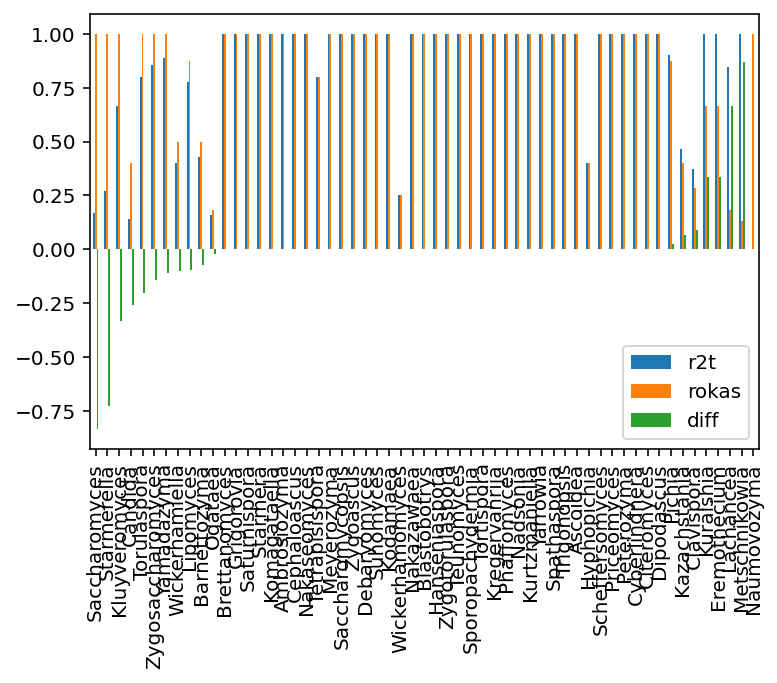

In [120]:
ax = df_mono_sorted[df_mono_sorted.index != 'Unavailable'].plot.bar(rot=0)
ax.set_xticklabels(df_mono_sorted.index, rotation=90)
ax
#plt.savefig(os.path.join(TREE_DIR,'monophyly_rokas.pdf'))        
# use ratio instead

In [122]:
species_part_of_low_monophyly = []
r2t_mono = []
rokas_mono = []
order = []
for k in set(use_names[use]):
    if k != '':
        r2t_v = r2t_order_to_species[k]
        rokas_v = rokas_order_to_species[k]
        if len(r2t_v) > 1 and len(rokas_v) > 1:
            x = find_monophyletic_max2(set(r2t_v),r2ttree)
            y = find_monophyletic_max2(set(rokas_v),rokastree)
            if x != 0 or y != 0:
                r2t_mono.append(x)
                rokas_mono.append(y)
    #             order.append(ncbi.get_taxid_translator([k])[k])
                order.append(k)
    #         if x != y:
    #             print(set(v))
df_mono = pd.DataFrame({'r2t':r2t_mono, 'rokas':rokas_mono},index=order)
df_mono['diff'] = df_mono['r2t']-df_mono['rokas']
if 'root' in order:
    df_mono = df_mono.drop('root')
df_mono['diff'] = df_mono.r2t - df_mono.rokas
df_mono_sorted = df_mono.sort_values(by='diff').dropna()
df_mono_sorted

,r2t,rokas,diff
Naumovozyma,0.666667,1.000000,-0.333333
Wickerhamiella,0.800000,1.000000,-0.200000
Torulaspora,0.800000,1.000000,-0.200000
Saccharomyces,0.857143,1.000000,-0.142857
Zygosaccharomyces,0.875000,1.000000,-0.125000
Yamadazyma,0.888889,1.000000,-0.111111
Starmerella,0.916667,1.000000,-0.083333
Spathaspora,1.000000,1.000000,0.000000
Zygotorulaspora,1.000000,1.000000,0.000000
Blastobotrys,1.000000,1.000000,0.000000


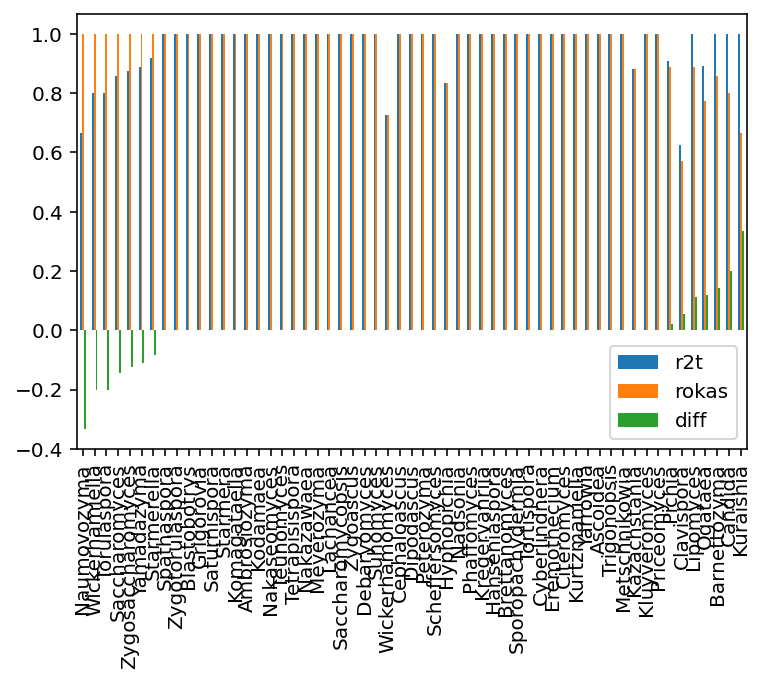

In [123]:
ax = df_mono_sorted[df_mono_sorted.index != 'Unavailable'].plot.bar(rot=90)
ax.set_xticklabels(df_mono_sorted[df_mono_sorted.index != 'Unavailable'].index, rotation=90)
ax
plt.savefig(os.path.join(TREE_DIR,'monophyly_max_'+use+'.pdf'), bbox_inches='tight', pad_inches=0)        
# use ratio instead

In [68]:
def find_monophyletic(x,t):
    for node in t.traverse():
        leaves_at_node = set(node.get_leaf_names())
        support = node.support
        if len(leaves_at_node - x) == 0 and len(leaves_at_node) > 1:
            yield len(leaves_at_node & x),support


species_part_of_low_monophyly = []
species_part_of_high_monophyly = []
r2t_mono = []
rokas_mono = []
order = []

for k,v in order_to_species.items():
    if len(v) > 1:
        x = list(find_monophyletic(set(v),r2ttree))
        x_denominator = len(v)-1
        if len(x)>0:
            x_mono = max(x)
            x_score = x_mono[0]-1
            x_support = x_mono[1]
            if (x_support > 1):
                x_support = x_support/100
            x_numerator = x_score*x_support
        else:
            x_numerator=0
            x_score=0
        x = x_numerator/x_denominator
        
        y = list(find_monophyletic(set(v),rokastree))
        y_denominator = len(v)-1
        if len(y)>0:
            y_mono = max(y)
            y_score = y_mono[0]-1
            y_support = y_mono[1]
            if (y_support > 1):
                y_support = y_support/100
            y_numerator = y_score*y_support
        else:
            y_numerator=0
            y_score=0
        y = y_numerator/y_denominator
        
        if x and y:
            r2t_mono.append(x)
            rokas_mono.append(y)
        elif x and not y:
            r2t_mono.append(x)
            rokas_mono.append(None)
#             print('Read2Tree: family {} has mono {}'.format(ncbi.get_taxid_translator([k])[k],mono))
        elif y and not x:
            rokas_mono.append(y)
            r2t_mono.append(None)
#             print('RokasTree: family {} has mono {}'.format(ncbi.get_taxid_translator([k])[k],mono))
        if x or y:
            order.append(k)
#             order.append(ncbi.get_taxid_translator([k])[k])
df_mono = pd.DataFrame({'r2t':r2t_mono, 'rokas':rokas_mono},index=order)
if 'root' in order:
    df_mono = df_mono.drop('root')
df_mono['diff'] = df_mono.r2t - df_mono.rokas
df_mono_sorted = df_mono.sort_values(by='diff')
df_mono_sorted

NameError: name 'order_to_species' is not defined

In [42]:
species_part_of_low_monophyly = []
r2t_mono = []
rokas_mono = []
order = []
out_dic = {'r2t':[], 'rokas':[], 'num_order':[]}
for k,v in order_to_species.items():
    print(k)
    if len(v) > 1:
        x = find_monophyletic_max2(set(v),r2ttree)
        y = find_monophyletic_max2(set(v),rokastree)
        if x != 0 or y != 0:
            out_dic['r2t'].append(x)
            out_dic['rokas'].append(y)
            order.append(k)
            out_dic['num_order'].append(len(v))
# df_mono = pd.DataFrame(out_dic, index=order)
df_mono = pd.DataFrame({'r2t': out_dic['r2t'], 'rokas':out_dic['rokas']}, index=order)
df_mono['diff'] = df_mono['r2t']-df_mono['rokas']
if 'root' in order:
    df_mono = df_mono.drop('root')
df_mono['diff'] = df_mono.r2t - df_mono.rokas
df_mono_sorted = df_mono.sort_values(by='diff').dropna()
df_mono_sorted

NameError: name 'order_to_species' is not defined